# Lab 2 Template

**Author:** [YOURNAME]

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice more about Variable of Transformation and Probability Distribution functions. 

## Instruction: Numpy random seed

Sometimes it's useful to have a reproducible random series for checking results. To do this, the easiest way is to set the seeding of a random number generator. For `Numpy`,

```python
import numpy as np
np.random.seed(42)
```

This makes the random numbers predictable and helps with checking results.

## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [1]:
# TODO: Import numpy, matplotlib.pyplot, scipy.stats, and any other necessary libraries
# Set numpy random seed for reproducibility
import numpy as np
np.random.seed(25)

# Variable of Transformation (3 points)

For a random distribution of x between 0 and 1. With variable of transformation $u=f(x)$, we can calculate the probability density function $g(u)$ using analytic method. In this assignment, we will draw a random sample from the uniform distribution, apply a transformation to each data point, and check the consistency of transformed distributions with the analytic prediction.

## Part 1: Transformation $u = x^2$

**TODO:** Complete the following steps:

1. Draw a 1000 events sample $x_i, i=0,1,...999$ using built-in distributions in scipy with Uniform density between 0 and 1.
2. For each value of $x_i$, calculate the transformed value $u = x^2$.
3. Draw the $u_i$ distribution. Plot the analytic solution g(u) in the same plot and compare the consistency.
4. Show details about how you derive $g(u)$ analytically.

In [2]:
import matplotlib.pyplot as plt

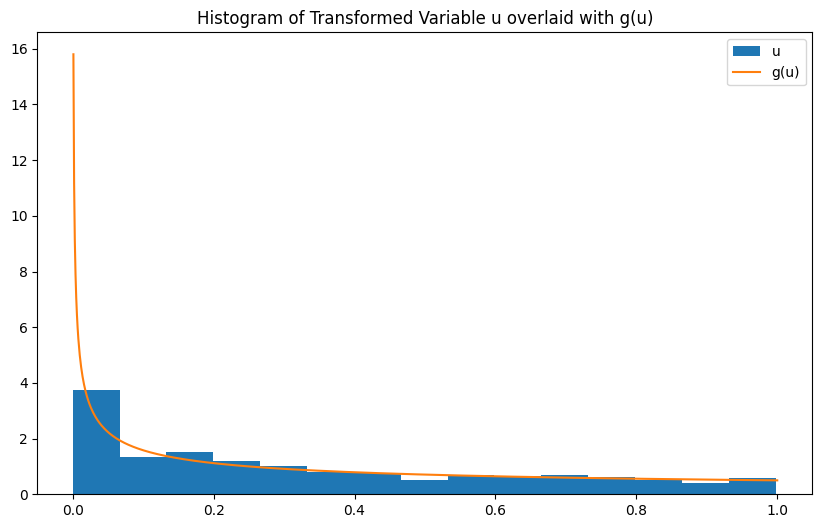

In [3]:
# TODO: Step 1 - Generate 1000 uniform random samples between 0 and 1
# Use scipy.stats.uniform or numpy.random.uniform

xx = np.random.uniform(0, 1, 1000) # this is our x. x ∈ [0, 1) by uniform() function definition.

# TODO: Step 2 - Apply transformation u = x^2
uu = xx**2 # this is our u(x)

# TODO: Step 3 - Plot histogram of transformed values
# Also plot the analytical solution g(u) (worked out in the markdown cell below)
dummyx = np.linspace(0,1,1000)
dummyx = dummyx[1:] # remove 0th elem to prevent dividing by zero inside g(u)
gg = 1/ (2 * np.sqrt(dummyx)) # this is our g(u)

# Create figure
nBins = 15

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(uu, bins=nBins, density=True, label='u')
ax.set_title(f"Histogram of Transformed Variable u overlaid with g(u)")
ax.plot(dummyx, gg, label='g(u)')
ax.legend()
plt.show()
# TODO: Step 4 - Add text explaining the analytical derivation
# For u = x^2, with x ~ Uniform(0,1), derive g(u)
# - SEE MARKDOWN CELL BELOW -

for $u = x^2$ where $0 \le x < 1$ -> u(x) is monotonically increasing -> can use Z&B eq 3.29

~~$g(u) = \int_{0}^{u}{g(u')du'} = \int_{0}^{x}{f(x')dx'}$~~

$g(u) = f(x)|\frac{dx}{du}|$ (eq 3.29)

invert u(x) to get x(u) and differentiate x(u) = sqrt(u) -> $\frac{dx}{du}=\frac{1}{2\sqrt{u}}$

f(x) is 1 (uniform distribution) -> $g(u) = 1\cdot\frac{1}{2\sqrt{u}} = \frac{1}{2\sqrt{u}}$

Range of u can be found by applying u(x) to the bounds of x. u(0) = 0^2 <= u < u(1) = 1^2

=> u ∈ [0, 1)

## Part 2: Additional Transformation

**TODO:** Repeat the analysis with one of the following transformations:
- a. $u = 1/x$
- b. $u = \sqrt{x}$
- c. $u = e^x$
- d. $u = \log(x)$

Choose one transformation and complete the same analysis as Part 1.

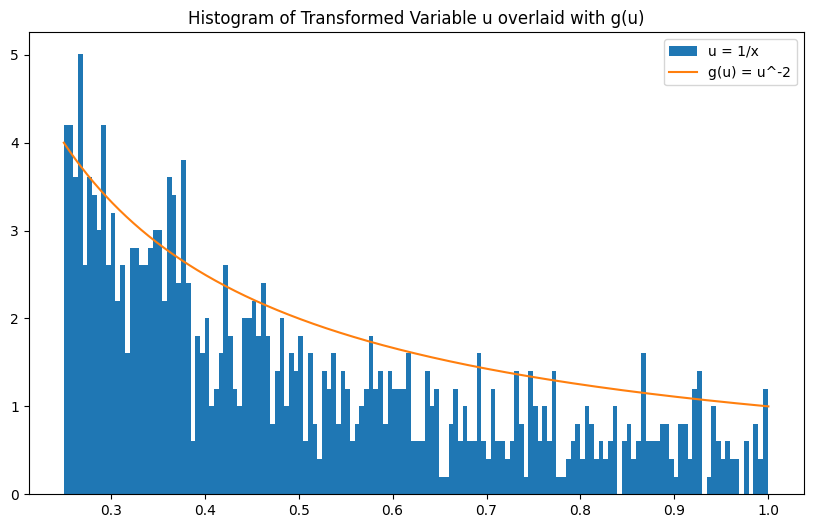

In [4]:
# TODO: Choose one transformation function and repeat the analysis
# 1. Apply the chosen transformation to the uniform samples
# 2. Plot histogram of transformed values
# 3. Derive and plot the analytical solution on the same graph
# 4. Compare simulation with analytical prediction


# Choice: u = 1/x. -> Reasonable range would be 1 <= x <= 2
# u(x) = 1/x is monotonically decreasing. Use same formula as part 1 (Z&B eq 3.29)
# x(u) = f^-1 (u) = 1/u, dx/du = -1/u^2
# same uniform pdf as above, f(x) = 1
# g(u) = f(x)|dx/du| = 1 * |-1/u^2| = 1/u^2 (We can take it out of abs sign since u always > 0)

# domain of u: apply transformation on bounds of x again
# u(1) >= u >= u(2)    <- sign flip since transformation "flips" (idk what it's called, but yk, arithmetic stuff)
# u(1) = 1/(1^2) = 1, u(2) = 1/(2^2) = 1/4
# u ∈ [0.25, 1]

# transform u(x)
x2 = np.random.uniform(1,2,1000)
dummyx2 = np.linspace(0.25,1,1000)
u2 = 1 / (x2**2)
g2 = 1 / dummyx2 

# plot histogram of u and graph of the analytical solution g(u)
nBins = 150

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(u2, bins=nBins, density=True, label='u = 1/x')
ax.set_title(f"Histogram of Transformed Variable u overlaid with g(u)")
ax.plot(dummyx2, g2, label='g(u) = u^-2')
ax.legend()
plt.show()

# Throwing two dices (3 points)

We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random number x by 6, take the integer part of the number and add it by one ($[0, 1] \rightarrow [0, 5] \rightarrow [1, 6]$), or use `numpy.random.uniform()`. This number represents the face of the dice. We can repeat this procedure to simulate rolling the dice N times.

**TODO:** Complete the following steps:

1. Simulate a pair of dices N=1000 times.
2. Calculate the sum of each pair.
3. Draw the distribution of the sum.
4. Calculate mean and variance of the distribution of the Sum.
5. Calculate the probability of Sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of Sevens to 1000. Evaluate the statistical uncertainty of the probability (assuming Binomial errors).
6. Compare the probability of Sevens from Step 5 to the analytic calculation based on the homework method. Discuss consistency between the simulation and analytical calculation.

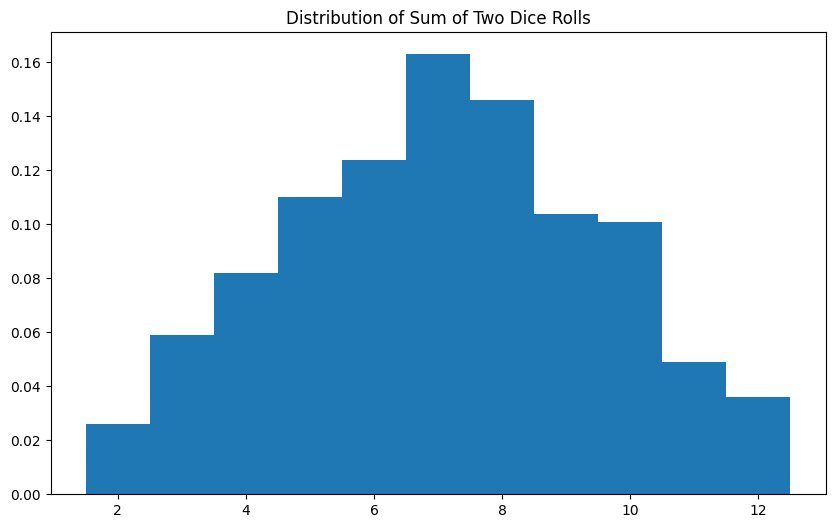

Distribution of Sum of Two Dice Rolls
Mean		:	7.077
Variance	:	6.045071

Probability summing to 7:	0.163
Statistical Uncertainty:	0.011680368144883104


In [5]:
# TODO: Step 1 - Simulate throwing two dice N=1000 times
# Use numpy.random.randint(1, 7, size=(1000, 2)) or equivalent method
def rollPair(N):
    x = np.random.uniform(0, 1, N) # N samples from [0, 1)
    diceRolls = np.floor(x * 6).astype(int) + 1 # x*6 maps to [0,6), floor func (+ int typecast) maps to [0,5], +1 to get to [1,6]
    return diceRolls

nRolls = 1000

roll1 = rollPair(nRolls) # roll1[i] paired with roll2[i]
roll2 = rollPair(nRolls)

# TODO: Step 2 - Calculate sum of each pair
roll_sum = roll1 + roll2 

# TODO: Step 3 - Plot distribution of sums
bins = np.arange(1.5, 12.6, 1) # so a value n gets binned between n-0.5 and n+0.5 like a bar plot

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(roll_sum, bins=bins, density=True)
ax.set_title("Distribution of Sum of Two Dice Rolls")
plt.show()

# TODO: Step 4 - Calculate mean and variance
sum_mean = roll_sum.mean()
sum_var = roll_sum.var()

print(f"Distribution of Sum of Two Dice Rolls\nMean\t\t:\t{sum_mean}\nVariance\t:\t{sum_var}\n")

# TODO: Step 5 - Calculate probability of sevens and statistical uncertainty
nSevens = np.sum(roll_sum == 7) # Create a boolean mask (1:True, 0:False) and sum it to get counts
pSevens = nSevens / nRolls # i.e. how many of 1000 pairs sum to seven?

# binomial dist. var = sigma squared = np(1-p), statistical uncertainty = sigma / n = sqrt(np(1-p))/n
error = np.sqrt(nRolls * pSevens * (1 - pSevens)) / nRolls

print(f"Probability summing to 7:\t{pSevens}\nStatistical Uncertainty:\t{error}")

# TODO: Step 6 - Compare with analytical calculation (1/6 probability) on a histogram plot

We can determine the probability of a pair summing to 7 as follows:

P(7) = (number of cases where pair sum = 7) / (total number of pair cases)

\# of cases where pair sum = 7: [1,6],[2,5],[3,4] and the flipped pairs of these -> 3+3 = 6

\# of total cases = 36 (pulling a specific combination of pair is 1/6 * 1/6 = 1/36. Which means total number of possible cases are 36 so p = (one unique pair)/(total # of cases))




=> P(7) = 6/36 = 1/6 = 0.16666...

In [6]:
print(1/6)

0.16666666666666666


# Central Limit Theorem (4 points)

The central limit theorem states that the distribution of the sample mean $\bar{x}$, 
$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$,
of N variables $x_i$ with finite variance $\sigma^2$ in the limit $N\to \infty$ will approach a normal distribution with variance $\sigma^2/N$ independent of the form of the distribution f(x). In this computational experiment, we will test this theorem.

Generate a M=5 event sample using built-in Poisson distributions in scipy with $\lambda=2.0$. From these 5 events, calculate mean $\mu_5$ and standard deviation $\sigma_5$. Repeat this process N times. For each time, you will draw different set of M=5 events, and calculate independent $\mu_5$ and $\sigma_5$, respectively.

## Part 1: N=10 samples

In [7]:
# import lines
import scipy.stats as st

In [23]:
# helper function that takes in N (number of iteration), M (number of events) pois (scipy poisson dist object) and returns mu and sigma
def mu_sigma(pois, N, M):
    # initialize holders to store values, 'replacing' elements of np.zeros of size N is faster than appending to empty lists
    mu = np.zeros(N)
    sigma = np.zeros(N) 
    # iterate N times
    for i in range(N):
        samples = pois.rvs(size=M) # draw M samples from our distribution
        mu[i] = samples.mean() # mean of M samples
        sigma[i] = samples.std(ddof=1) # standard deviation of M sample, using ddof=1 for unbiased (using (n-1) instead of n for denominator)

    return mu, sigma

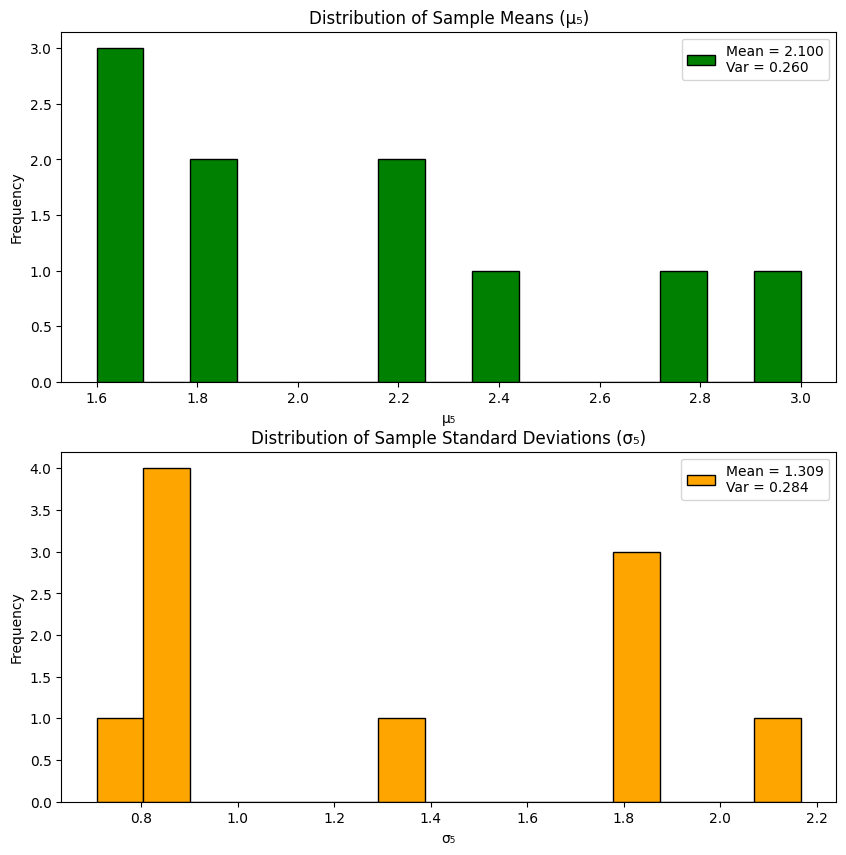

In [31]:
# TODO: Let N=10. Generate N sets of M=5 Poisson samples with lambda=2.0
lamb = 2.0
pois5 = st.poisson(lamb) # initialize our poisson distribution. We will draw samples from this for all cases of N.
M = 5 # number of events we wish to sample each time

# Calculate mu_5 and sigma_5 for each set
N = 10
mu_5, sigma_5 = mu_sigma(pois5, N, M)

# calculate mean and variance of mu_5 and sigma_5
mu_mean = mu_5.mean()
mu_var = mu_5.var(ddof=1)
sigma_mean = sigma_5.mean()
sigma_var = sigma_5.var(ddof=1)

# Plot distributions of mu_5 and sigma_5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column
nBins = 15
# plot for mu
ax1.hist(mu_5, bins=nBins, color='green', edgecolor='black', label=f"Mean = {mu_mean:.3f}\nVar = {mu_var:.3f}")
ax1.set_title("Distribution of Sample Means (μ₅)")
ax1.set_xlabel("μ₅")
ax1.set_ylabel("Frequency")
# plot for sigma
ax2.hist(sigma_5, bins=nBins, color='orange', edgecolor='black', label=f"Mean = {sigma_mean:.3f}\nVar = {sigma_var:.3f}")
ax2.set_title("Distribution of Sample Standard Deviations (σ₅)")
ax2.set_xlabel("σ₅")
ax2.set_ylabel("Frequency")

ax1.legend()
ax2.legend()
plt.show()

## Part 2: N=100 samples

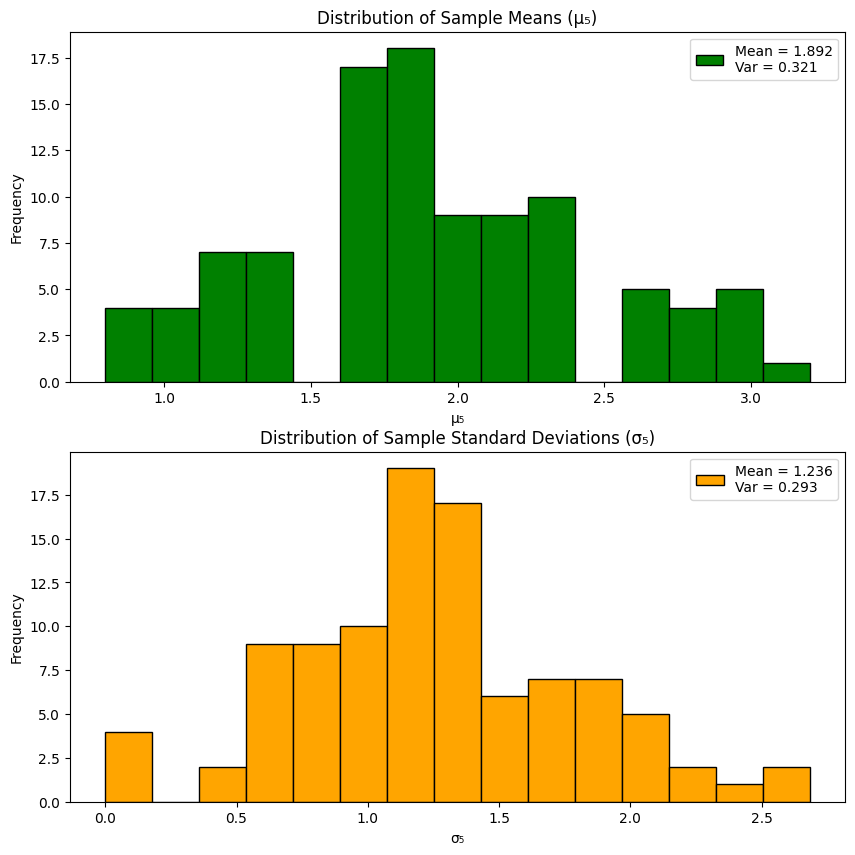

In [29]:
# TODO: Let N=100. Repeat the same analysis as Part 1

# Calculate mu_5 and sigma_5 for each set
N = 100
mu_5, sigma_5 = mu_sigma(pois5, N, M)

# calculate mean and variance of mu_5 and sigma_5
mu_mean = mu_5.mean()
mu_var = mu_5.var(ddof=1)
sigma_mean = sigma_5.mean()
sigma_var = sigma_5.var(ddof=1)

# Plot distributions of mu_5 and sigma_5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column
nBins = 15
# plot for mu
ax1.hist(mu_5, bins=nBins, color='green', edgecolor='black', label=f"Mean = {mu_mean:.3f}\nVar = {mu_var:.3f}")
ax1.set_title("Distribution of Sample Means (μ₅)")
ax1.set_xlabel("μ₅")
ax1.set_ylabel("Frequency")
# plot for sigma
ax2.hist(sigma_5, bins=nBins, color='orange', edgecolor='black', label=f"Mean = {sigma_mean:.3f}\nVar = {sigma_var:.3f}")
ax2.set_title("Distribution of Sample Standard Deviations (σ₅)")
ax2.set_xlabel("σ₅")
ax2.set_ylabel("Frequency")

ax1.legend()
ax2.legend()
plt.show()

## Part 3: N=1000 samples

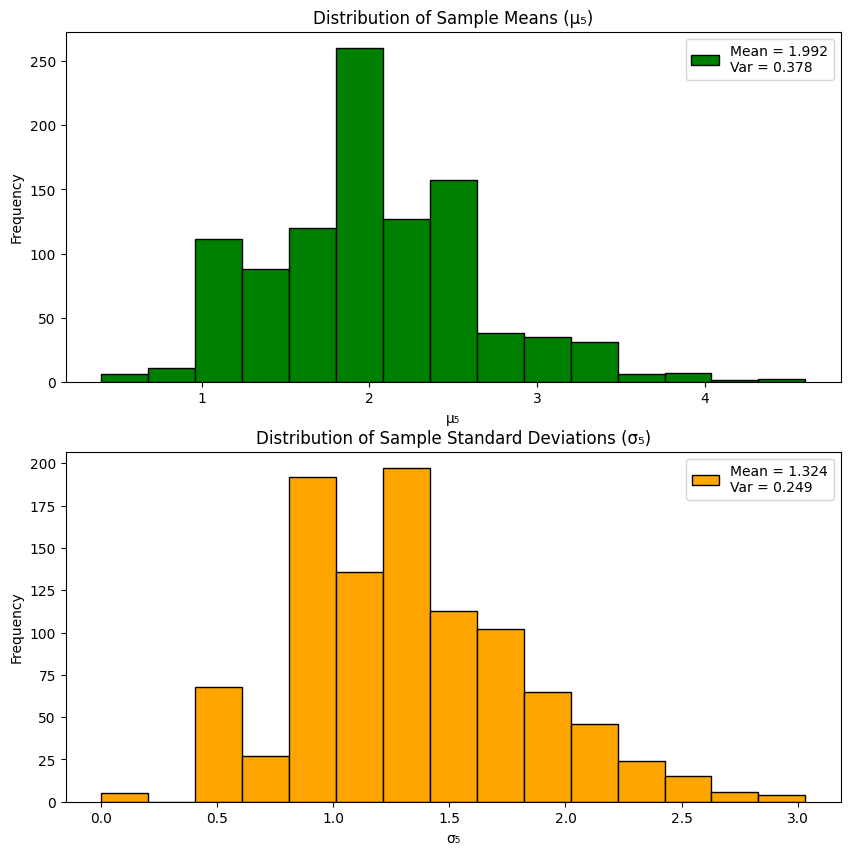

In [30]:
# TODO: Let N=1000. Repeat the same analysis

# Calculate mu_5 and sigma_5 for each set
N = 1000
mu_5, sigma_5 = mu_sigma(pois5, N, M)

# calculate mean and variance of mu_5 and sigma_5
mu_mean = mu_5.mean()
mu_var = mu_5.var(ddof=1)
sigma_mean = sigma_5.mean()
sigma_var = sigma_5.var(ddof=1)

# Plot distributions of mu_5 and sigma_5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column
nBins = 15
# plot for mu
ax1.hist(mu_5, bins=nBins, color='green', edgecolor='black', label=f"Mean = {mu_mean:.3f}\nVar = {mu_var:.3f}")
ax1.set_title("Distribution of Sample Means (μ₅)")
ax1.set_xlabel("μ₅")
ax1.set_ylabel("Frequency")
# plot for sigma
ax2.hist(sigma_5, bins=nBins, color='orange', edgecolor='black', label=f"Mean = {sigma_mean:.3f}\nVar = {sigma_var:.3f}")
ax2.set_title("Distribution of Sample Standard Deviations (σ₅)")
ax2.set_xlabel("σ₅")
ax2.set_ylabel("Frequency")

ax1.legend()
ax2.legend()
plt.show()

## Part 4: Discussion

**TODO:** Discuss your observations:
- a. Does $\mu_5$ and $\sigma_5$ approach Normal distributions when N is approaching a larger number?
- b. Is the variance of $\mu_5$ and $\sigma_5$ following some scaling rule as function of N?

#### a) 

I want to see even bigger N values before I make judgement, but to my humble eyeball it seems both mu_5 and sigma_5 start to somewhat resemble a "bell curve" (which refers to normal distribution in most cases but there are many such distributions that are bell shaped.) Hard to tell what distribution it looks like, but as N gets larger the histograms definitely do get closer to resembling a normal distribution.

#### b)

No, not really. It is hard to tell a trend from just 3 runs when the variance isn't monotonically increasing or decreasing with N

## Part 5: M=100 events

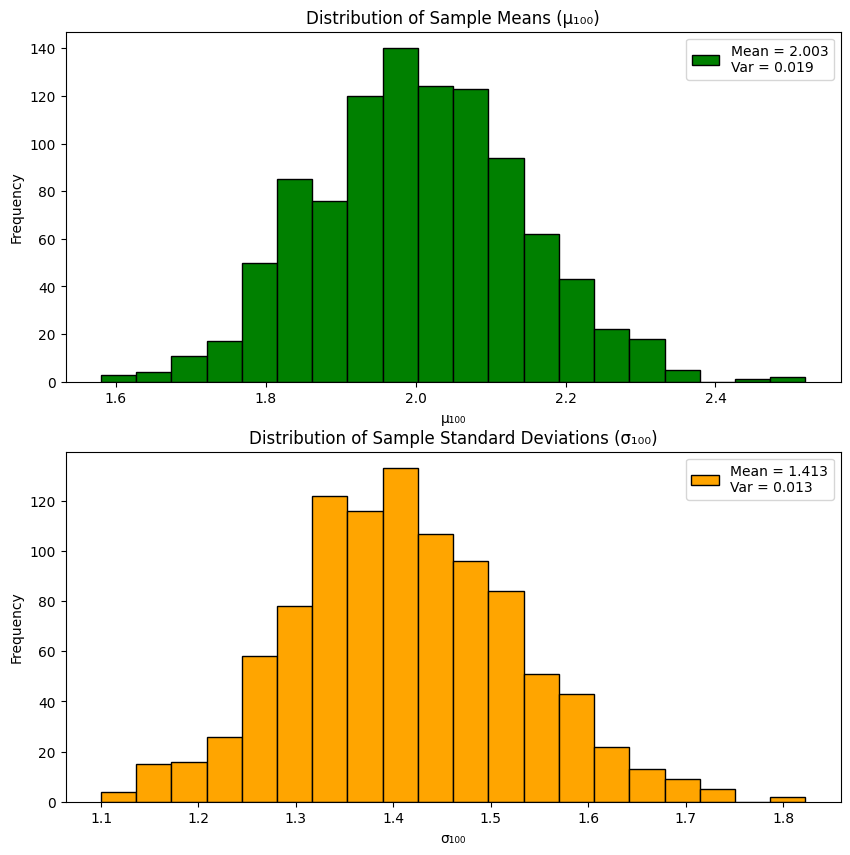

In [34]:
# TODO: Fix N=1000, plot distribution of mu_100 and sigma_100
# which are mean and standard deviation of a sample of M=100 events with lambda=2.0
# Discuss your observation
N = 1000
M = 100
mu_100, sigma_100 = mu_sigma(pois5, N, M) # i know the name says pois5 but it's really just poisson(lambda=2.0)

# calculate mean and variance of mu_5 and sigma_5
mu_mean = mu_100.mean()
mu_var = mu_100.var(ddof=1)
sigma_mean = sigma_100.mean()
sigma_var = sigma_100.var(ddof=1)

# Plot distributions of mu_100 and sigma_100
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column
nBins = 20
# plot for mu
ax1.hist(mu_100, bins=nBins, color='green', edgecolor='black', label=f"Mean = {mu_mean:.3f}\nVar = {mu_var:.3f}")
ax1.set_title("Distribution of Sample Means (μ₁₀₀)")
ax1.set_xlabel("μ₁₀₀")
ax1.set_ylabel("Frequency")
# plot for sigma
ax2.hist(sigma_100, bins=nBins, color='orange', edgecolor='black', label=f"Mean = {sigma_mean:.3f}\nVar = {sigma_var:.3f}")
ax2.set_title("Distribution of Sample Standard Deviations (σ₁₀₀)")
ax2.set_xlabel("σ₁₀₀")
ax2.set_ylabel("Frequency")

ax1.legend()
ax2.legend()
plt.show()

#### Observation:

Both the sample means and sample standart deviations resemble a normal distribution (beautiful bell curve!). Also the variance of these sample stats are very small compared to the cases where M=5. The mean of these sample stats also converge to the theoretical value for a poisson distribution of lambda = 2.0. (mu = E(k) = lambda = 2.0 & var = lambda, std = sqrt(var) = sqrt(2) ~= 1.414)

# Bonus (+3 points)

Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

In [49]:
# TODO: Choose a distribution (e.g., exponential, gamma, beta, etc.)
# Generate 1000 samples of 100 events each
# Calculate mean and variance for each sample
# Show that the distributions of means and variances approach Normal

# We can still utilize the helper function mu_sigma() as long as we pass in a distribution object that has rvs(size) method
#
lplc = st.laplace() # using default params loc=0, scale=1
# N = 1000, M = 100 already initialized above
mu_l, sigma_l = mu_sigma(lplc, N, M)

# calculate mean and variance of mu_l and sigma_l
mu_mean = mu_l.mean()
mu_var = mu_l.var(ddof=1)
sigma_mean = sigma_l.mean()
sigma_var = sigma_l.var(ddof=1)

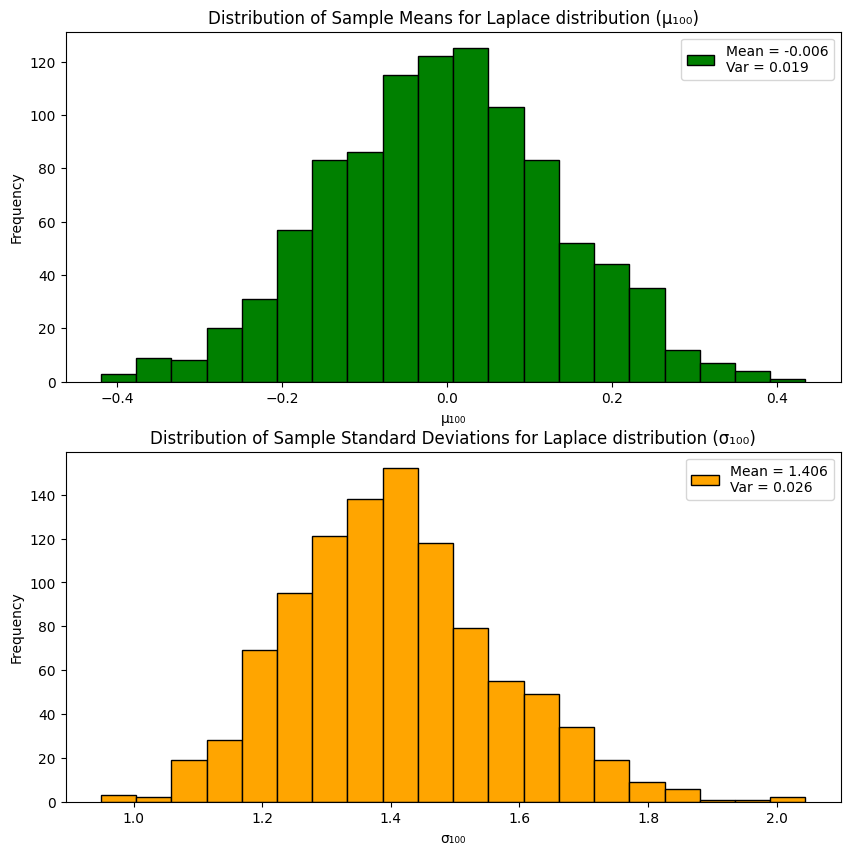

In [50]:
# Plot distributions of mu_100 and sigma_100
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column
nBins = 20
# plot for mu
ax1.hist(mu_l, bins=nBins, color='green', edgecolor='black', label=f"Mean = {mu_mean:.3f}\nVar = {mu_var:.3f}")
ax1.set_title("Distribution of Sample Means for Laplace distribution (μ₁₀₀)")
ax1.set_xlabel("μ₁₀₀")
ax1.set_ylabel("Frequency")
# plot for sigma
ax2.hist(sigma_l, bins=nBins, color='orange', edgecolor='black', label=f"Mean = {sigma_mean:.3f}\nVar = {sigma_var:.3f}")
ax2.set_title("Distribution of Sample Standard Deviations for Laplace distribution (σ₁₀₀)")
ax2.set_xlabel("σ₁₀₀")
ax2.set_ylabel("Frequency")

ax1.legend()
ax2.legend()
plt.show()

#### Theoretical values:

Mean of Laplace distribution is $\mu$ which is the `loc` parameter, which was 0. Variance of Laplace distribution is $2b^2$ where b is the `scale` parameter, which was 1. Standard deviation is given by sqrt(var) which in our case would be $\sqrt{2}$ ~= 1.414

We got pretty close! and variance of this sample statistic is pretty small, just like the case above with N=1000, M=100 for poisson distribution.

## Summary and Reflection

**TODO:** Reflect on your laboratory experience by discussing these 3 key takeaways:

### 1. Variable Transformations and Analytical Validation
Discuss how well your simulated distributions matched the analytical probability density functions you derived. What did this teach you about the relationship between mathematical transformations and probability distributions? Comment on the importance of being able to validate simulations with analytical solutions.

### 2. Monte Carlo Methods and Statistical Uncertainty
Based on your dice simulation results, evaluate the reliability of Monte Carlo methods for estimating probabilities. How did your simulated probability of sevens compare to the theoretical 1/6, and what role did statistical uncertainty play in validating your results?

### 3. Central Limit Theorem Universality
Describe your observations of how sample means approached normal distributions as sample size increased, regardless of the underlying distribution (Poisson, and your bonus distribution if completed). What does this reveal about the power and universality of the Central Limit Theorem in statistical analysis?

### 1. 

For both parts in this section, the simulated distributions did match the analytically determined PDF $g(u)$ quite well (qualitatively)

Mapping a variable to a different domain also maps the PDF in 'original' domain to the other domain.

Whenever we wish to generate samples from a transformed variable, we can validate those samples by finding the analytic solution by hand and overlaying it to the simulated data and "eyeball" to see if they match, like we did in this lab. (Or analyze it quantitatively if it is "hard to tell" qualitatively.)

### 2.

Our dice simulation gave us $P(7) = 0.163$ with statistical uncertainty $\approx 0.012$. The theoretical value $\frac{1}{6}=0.1666.. \approx 0.167$ is well within $0.163 \pm 0.012$ so our simulation is valid. 

Without the statistical uncertainty we would not be able to quantitatively validate this simulation.

#### 3. 

As the sample size increases (M in our case) the means and standard deviations of samples will get closer to normal distributions (not the samples, nut the means and std's of samples.)

The more number of samples you draw each time, the more likely the sample mean will take a value of the true mean value of the distribution the samples are drawn from. (Variance scales 1 / (M-1)) And those sample means will follow a gaussian pdf as the sample size increases.

This applies to any statistical distribution with a finite variance (I tried the bonus section with Cauchy distribution and learned this. As the Cauchy distribution has infinite variance, I could not get it to work no matter what!) which is a very useful fact when it comes to estimating parameters (mean, std) of a population whose distribution we do not yet know. Draw MANY MANY number of samples, repeat it MANY MANY times, and you shall get closer to the true values of the parameters!